In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기 : ', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
x_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.3, random_state = 156)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_preds = lr.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance Score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance Score : 0.757


In [6]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha = 10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring='neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 개별 Negative MSE scores : ', np.round(neg_mse_scores, 3))
print('5 folds 개별 RMSE scores: ', np.round(rmse_scores, 3))
print('5 folds 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds 개별 Negative MSE scores :  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds 개별 RMSE scores:  [3.38  4.929 5.305 8.637 5.34 ]
5 folds 평균 RMSE : 5.518


In [8]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring='neg_mean_squared_error', cv = 5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    
    print('alpha {0} 일 때, 5 folds의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때, 5 folds의 평균 RMSE : 5.829
alpha 0.1 일 때, 5 folds의 평균 RMSE : 5.788
alpha 1 일 때, 5 folds의 평균 RMSE : 5.653
alpha 10 일 때, 5 folds의 평균 RMSE : 5.518
alpha 100 일 때, 5 folds의 평균 RMSE : 5.330


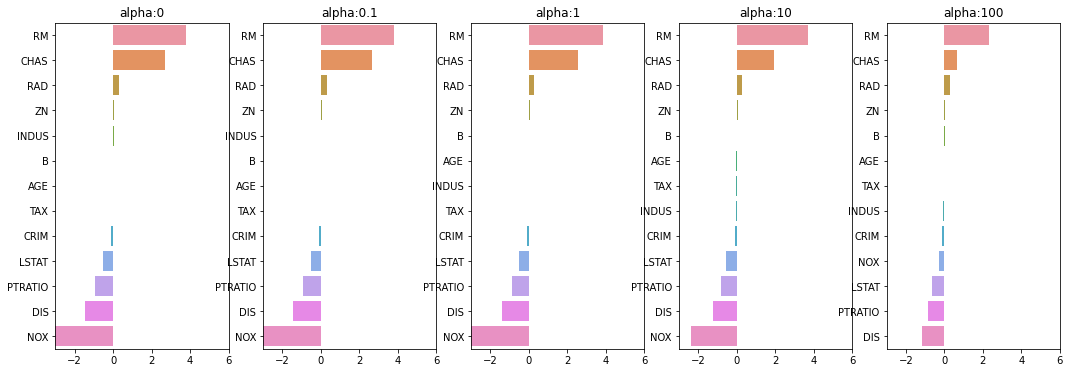

In [10]:
# 각 alpha에 따른 회귀 계수값을 시각화하기 위해 5개의 열로 된 맷플로립 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows = 1, ncols = 5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장, pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(x_data, y_target)
    # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index = x_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending = False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y = coeff.index, ax = axs[pos])
    
# for문 바깥에서 맷플로립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [18]:
ridge_alphas = [0,0.1,1,10,100]
sort_columns = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_columns, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [30]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 변환
def get_linear_reg_eval(model_name, params=None, x_data_n = None, y_target_n = None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('########', model_name, '########')
    for param in params:
        if model_name =='Ridge' : model = Ridge(alpha = param)
        elif model_name == 'Lasso' : model = Lasso(alpha = param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha = param, l1_ratio = 0.7)
        neg_mse_scores = cross_val_score(model, x_data_n, y_target_n, scoring = 'neg_mean_squared_error', cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0} 일 때, 5 폴드 세트의 평균 RMSE : {1:.3f}'.format(param, avg_rmse))
        #cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(x_data_n, y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 저장
            coeff = pd.Series(data=model.coef_, index = x_data_n.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname] = coeff
            
    return coeff_df

In [31]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df=get_linear_reg_eval('Lasso', params = lasso_alphas, x_data_n = x_data, y_target_n = y_target)

######## Lasso ########
alpha 0.07 일 때, 5 폴드 세트의 평균 RMSE : 5.612
alpha 0.1 일 때, 5 폴드 세트의 평균 RMSE : 5.615
alpha 0.5 일 때, 5 폴드 세트의 평균 RMSE : 5.669
alpha 1 일 때, 5 폴드 세트의 평균 RMSE : 5.776
alpha 3 일 때, 5 폴드 세트의 평균 RMSE : 6.189


In [32]:
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [33]:
elastic_alphas = [0.07, 0.1,0.5,1,3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params = elastic_alphas, x_data_n = x_data, y_target_n = y_target)

######## ElasticNet ########
alpha 0.07 일 때, 5 폴드 세트의 평균 RMSE : 5.542
alpha 0.1 일 때, 5 폴드 세트의 평균 RMSE : 5.526
alpha 0.5 일 때, 5 폴드 세트의 평균 RMSE : 5.467
alpha 1 일 때, 5 폴드 세트의 평균 RMSE : 5.597
alpha 3 일 때, 5 폴드 세트의 평균 RMSE : 6.068


In [34]:
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


In [40]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler

def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else :
        scaled_data = input_data
        
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias = False).fit_transform(scaled_data)
        
    return scaled_data

In [41]:
# Ridge의 alpha 값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE추출
alphas = [0.1,1,10,100]

# 5개 방식으로 변환. 먼저 원본 그대로, 표준 정규 분포, 표준 정규 분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scale_methods = [(None, None), ('Standard', None),('Standard',2),('MinMax',None),('MinMax',2),('Log',None)]

for scale_method in scale_methods:
    x_data_scaled = get_scaled_data(method = scale_method[0], p_degree = scale_method[1],input_data=x_data)
    print('\n## 변환 유형 : {0}, Polynomial Degree : {1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params = alphas, x_data_n = x_data_scaled, y_target_n = y_target, verbose = False, return_coeff=False)


## 변환 유형 : None, Polynomial Degree : None
alpha 0.1 일 때, 5 폴드 세트의 평균 RMSE : 5.788
alpha 1 일 때, 5 폴드 세트의 평균 RMSE : 5.653
alpha 10 일 때, 5 폴드 세트의 평균 RMSE : 5.518
alpha 100 일 때, 5 폴드 세트의 평균 RMSE : 5.330

## 변환 유형 : Standard, Polynomial Degree : None
alpha 0.1 일 때, 5 폴드 세트의 평균 RMSE : 5.826
alpha 1 일 때, 5 폴드 세트의 평균 RMSE : 5.803
alpha 10 일 때, 5 폴드 세트의 평균 RMSE : 5.637
alpha 100 일 때, 5 폴드 세트의 평균 RMSE : 5.421

## 변환 유형 : Standard, Polynomial Degree : 2
alpha 0.1 일 때, 5 폴드 세트의 평균 RMSE : 8.827
alpha 1 일 때, 5 폴드 세트의 평균 RMSE : 6.871
alpha 10 일 때, 5 폴드 세트의 평균 RMSE : 5.485
alpha 100 일 때, 5 폴드 세트의 평균 RMSE : 4.634

## 변환 유형 : MinMax, Polynomial Degree : None
alpha 0.1 일 때, 5 폴드 세트의 평균 RMSE : 5.764
alpha 1 일 때, 5 폴드 세트의 평균 RMSE : 5.465
alpha 10 일 때, 5 폴드 세트의 평균 RMSE : 5.754
alpha 100 일 때, 5 폴드 세트의 평균 RMSE : 7.635

## 변환 유형 : MinMax, Polynomial Degree : 2
alpha 0.1 일 때, 5 폴드 세트의 평균 RMSE : 5.298
alpha 1 일 때, 5 폴드 세트의 평균 RMSE : 4.323
alpha 10 일 때, 5 폴드 세트의 평균 RMSE : 5.185
alpha 100 일 때, 5 폴드 세트의 평균 RMSE : 

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

def true_fun(x):
    return np.cos(1.5*np.pi*x)

np.random.seed(0)
n_samples = 30
x = np.sort(np.random.rand(n_samples))

y = true_fun(x)+np.random.randn(n_samples)*0.1

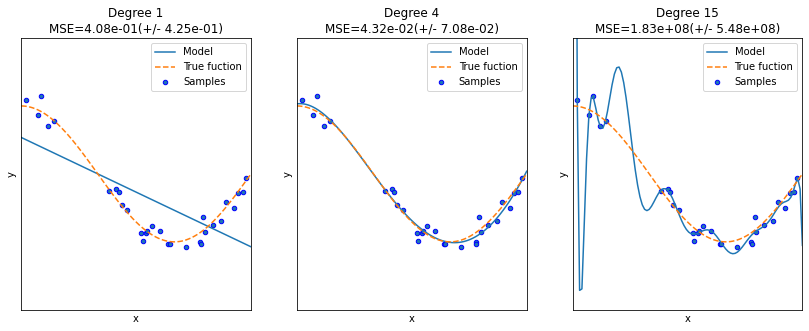

In [46]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

for i in range(len(degrees)):
    ax = plt.subplot(1,len(degrees),i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    pipeline.fit(x.reshape(-1,1),y)
    
    scores = cross_val_score(pipeline,x.reshape(-1,1),y,scoring="neg_mean_squared_error",cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    
    x_test = np.linspace(0,1,100)
    plt.plot(x_test, pipeline.predict(x_test[:,np.newaxis]), label="Model")
    plt.plot(x_test, true_fun(x_test), '--', label = "True fuction")
    plt.scatter(x,y, edgecolor='b',s=20, label = "Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE={:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()